# 08-Linear regression

This notebook shows how to perform simple and multiple linear regression in Python.

So far, we have seen how to do simple data analysis, e.g. `value_counts`, `describe`, `corr` etc. 

In linear regression, we take the analysis one step further by estimating a line that quantifies the relationship between variables in our data. 

The most common method for finding the regression line is OLS (ordinary linear square), where we find the intercept and slope of the line by minimizing the sum of the squared residuals.

<img src="images/regression_line.png" width = "45%" align="left"/>

We will use the OLS estimator from the package `statsmodels`. Using the sub-module `formula` allows us to fit statistical models using R-style formulas.

We import `statsmodels` by giving it the shorter name `smf`.

In [2]:
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

## Simple linear regression

In simple linear regression, we use data to estimate the relationship between a variable $y$ and a single variable $x$:

$y_i = \alpha + \beta x_i $

where:
- $y$ is the dependent variable
- $x$ is the explanatory (independent) variable
- $\alpha$ is the constant term
- $\beta$ is the slope of the regression line

Let us explore the variation in cars' fuel economy (mpg).

In [3]:
mpg_df = pd.read_excel('data/mpg.xlsx')

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,140.0,3449,10.5,70,usa,ford torino


In [4]:
len(mpg_df)

398

`corr` shows a strong negative relationship between fuel economy and horsepower.

In [5]:
mpg_df.corr()

,mpg,cylinders,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.842983,0.896017,-0.505419,-0.348746
horsepower,-0.778427,0.842983,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.416361,-0.306564,0.288137,1.000000


In [11]:
correlation = round(mpg_df.corr().loc['horsepower', 'mpg'], 2)

correlation

-0.78

Let us create a scatter plot between mpg and horsepower, and add the correlation coefficient as a title to the plot.

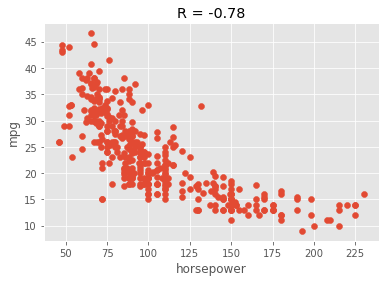

In [13]:
fig, ax = plt.subplots()

ax.scatter(mpg_df['horsepower'],
           mpg_df['mpg'])

# add axis labels
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

# add title
ax.set_title('R = ' + str(correlation))

plt.show()

However, notice that there are a few missing observations in the data.

In [14]:
mpg_df.isna().sum()

mpg             0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Before estimating a statistical model, we should use `dropna` in order to drop all rows with missing observations.

Notice that by setting `subset = ['mpg', 'horsepower']`, we only drop the rows with `NaN` in the columns that we will be using in our statistical model.

In [15]:
mpg_df.dropna(subset = ['mpg', 'horsepower'], axis = 0, inplace = True)

len(mpg_df)

392

We are estimating the following model:

$mpg_i = \alpha + \beta \times horsepower_i$

We start by transforming the model to a R-style formula. Notice that we do not have to add a constant term to the model formula (the constant term will be added automatically).

In [41]:
formula = 'mpg ~ horsepower'

formula

'mpg ~ horsepower'

We create an OLS model by using the `ols` function from `smf`. 

`ols` requires two inputs: the model formula and the data that we want to estimate the model with.

In [42]:
# create OLS model
model = smf.ols(formula, data = mpg_df)

After we have created the OLS model, we must use `fit` in order to actually estimate the model.

In [43]:
# estimate model
model = model.fit()

In [23]:
model

In order to see the regression results, we apply the function `summary` on our `model`.

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           7.03e-81
Time:                        13:29:59   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The table contains a lof of information that is stored in the `model` attributes.

- The `param` attribute of `model` contains the model coefficients (intercept and slope).

In [137]:
model.params

Intercept              37.373489
C(model_year)[T.71]    -2.009969
C(model_year)[T.72]    -2.656946
C(model_year)[T.73]    -2.900221
C(model_year)[T.74]    -2.057055
C(model_year)[T.75]    -3.649392
C(model_year)[T.76]    -2.335741
C(model_year)[T.77]    -0.007808
C(model_year)[T.78]    -0.037664
C(model_year)[T.79]     1.195717
C(model_year)[T.80]     6.747184
C(model_year)[T.81]     3.602455
C(model_year)[T.82]     5.474123
horsepower             -0.133154
dtype: float64

In [26]:
model.params['Intercept']

39.935861021170474

- The `bse` attribute of `model` contains the standard errors of the coefficients.

In [46]:
model.bse

Intercept     0.717499
horsepower    0.006446
dtype: float64

- The `rsquared` and `rsquared_adj` attributes of `model` contains the model's R-squared and adjusted R-squared.

In [81]:
model.rsquared

0.605948257889435

In [48]:
model.rsquared_adj

0.6049378688071001

<div class = "alert alert-info">
<h3> Your turn</h3>
    
<p> Use instead <code>weight</code> as the only explanatory variable for explaining variation in <code>mpg</code>. Print the model's adjusted R-squared.
    
</p>
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
# define model formula
formula2 = 'mpg ~ weight'

# create and fit OLS model
model2 = smf.ols(formula2, data = mpg_df).fit()

# store adj. R-squared
rsqr = round(model2.rsquared_adj, 3)

print('The adjusted R-squared: ' + str(rsqr))
```

</p>
</details> 

In [40]:
formula = 'mpg ~ weight'
model2 = smf.ols(formula,data=mpg_df)
model2 = model2.fit()
model2.summary()

model2.rsquared

0.6926304331206254

#### In-sample prediction

Once we have estimated the OLS model, can use it to create a prediction for the dependent variable given our observations on the explanatory variable (this will allow us to visualize the regression line). 

We apply `predict` on the `model` in order to generate predictions. 

As a default, `predict` will predict the fuel economy for each observation of horsepower in the data.

In [49]:
# in-sample predictions
pred = model.predict()

pred

array([32.67500329, 32.67500329, 32.35931382, 32.35931382, 32.35931382,
       32.20146909, 31.72793489, 31.72793489, 31.72793489, 31.72793489,
       31.57009015, 31.57009015, 31.41224542, 30.78086649, 30.78086649,
       30.46517702, 30.46517702, 30.46517702, 30.46517702, 30.46517702,
       30.30733229, 30.14948755, 30.14948755, 29.99164282, 29.99164282,
       29.99164282, 29.83379809, 29.67595335, 29.67595335, 29.67595335,
       29.67595335, 29.67595335, 29.67595335, 29.67595335, 29.67595335,
       29.67595335, 29.67595335, 29.51810862, 29.36026389, 29.36026389,
       29.36026389, 29.36026389, 29.36026389, 29.36026389, 29.36026389,
       29.36026389, 29.36026389, 29.36026389, 29.36026389, 29.36026389,
       29.20241915, 29.20241915, 29.20241915, 29.20241915, 29.20241915,
       29.20241915, 29.04457442, 29.04457442, 29.04457442, 28.88672969,
       28.88672969, 28.88672969, 28.88672969, 28.88672969, 28.88672969,
       28.88672969, 28.88672969, 28.88672969, 28.88672969, 28.88

We can store the predictions in the original `DataFrame` by assigning the sequence of prediction to a new column `pred`.

In [50]:
mpg_df['pred'] = pred

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name,pred
19,26.0,4,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan,32.675003
102,26.0,4,46.0,1950,21.0,73,europe,volkswagen super beetle,32.675003
326,43.4,4,48.0,2335,23.7,80,europe,vw dasher (diesel),32.359314
325,44.3,4,48.0,2085,21.7,80,europe,vw rabbit c (diesel),32.359314
244,43.1,4,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel,32.359314


Let us create a line plot of `pred` on the y-axis, and `horsepower` on the x-axis. This will show us the regression line.

However, notice that in order to get a nice line, we first have to sort the data according to the explanatory variable, `horsepower`.

In [36]:
# sort values
mpg_df.sort_values('horsepower', inplace = True)

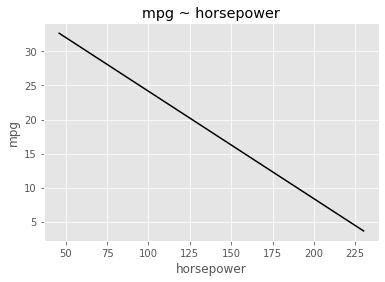

In [51]:
fig, ax = plt.subplots()

# line plot
ax.plot(mpg_df['horsepower'],
        mpg_df['pred'],
        color = 'black')

# add axis labels
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

# add title
ax.set_title(formula)

plt.show()

Let us add a scatter plot of actual `mpg` and `horsepower` to the plot with the regression line.

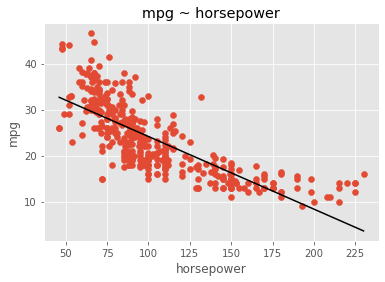

In [52]:
fig, ax = plt.subplots()

# scatter plot
ax.scatter(mpg_df['horsepower'],
           mpg_df['mpg'])

# line plot
ax.plot(mpg_df['horsepower'],
        mpg_df['pred'],
        color = 'black')

# add axis labels
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

# add title
ax.set_title(formula)

plt.show()

<div class = "alert alert-info">
<h3> Your turn</h3>
    
<p> Plot the regression line from the model that explains <code>mpg</code> using <code>weight</code> as the explanatory variable, along with a scatter plot of <code>mpg</code> and <code>weight</code>.
    
</p>
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
### Re-run the model ###

# define model formula
formula2 = 'mpg ~ weight'

# create and fit OLS model
model2 = smf.ols(formula2, data = mpg_df).fit()

# store adj. R-squared
rsqr = round(model2.rsquared_adj, 3)

print('The adjusted R-squared: ' + str(rsqr))

# in-sample predictions
mpg_df['pred2'] = model2.predict()

# sort values
mpg_df.sort_values('weight', inplace = True)


### Plot ###
fig, ax = plt.subplots()

# scatter plot
ax.scatter(mpg_df['weight'],
           mpg_df['mpg'])

# line plot
ax.plot(mpg_df['weight'],
        mpg_df['pred2'],
        color = 'black')

# add axis labels
ax.set_xlabel('weight')
ax.set_ylabel('mpg')

# add title
ax.set_title(formula2)

plt.show()
```

</p>
</details> 

Text(0.5, 1.0, 'mpg ~ weight')

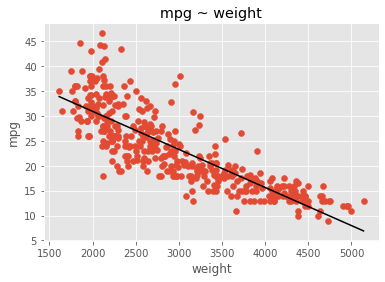

In [62]:
formula2 = 'mpg ~ weight'
model2 = smf.ols(formula,data=mpg_df)
model2 = model2.fit()
#model2.summary()
#model2.rsquared
pred2 = model2.predict()
mpg_df['pred2'] = pred2
mpg_df.sort_values("weight",inplace=True)


fig, ax = plt.subplots()

ax.plot(mpg_df['weight'],
       mpg_df['pred2'],
       color='black')

ax.scatter(mpg_df['weight'],
          mpg_df['mpg'])

ax.set_xlabel('weight')
ax.set_ylabel('mpg')

ax.set_title(formula2)


In addition, we can visually inspect how well `horsepower` explains variation in fuel economy.
- First, we create a 45 degree line by plotting actual `mpg` against actual `mpg`.
- Second, we create a scatter plot of actual `mpg` and `pred`.

The closer the predictions are to the 45 degree line, the better job does our model at explaining the variation in fuel economy.

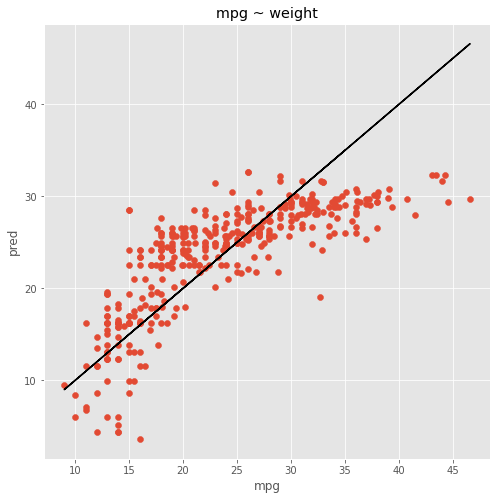

In [64]:
fig, ax = plt.subplots(figsize=(8,8))

# 45 degree line
ax.plot(mpg_df['mpg'], 
        mpg_df['mpg'], 
        color = 'black')

# scatter plot
ax.scatter(mpg_df['mpg'],
           mpg_df['pred'])

# add axis labels
ax.set_xlabel('mpg')
ax.set_ylabel('pred')

# add title
ax.set_title(formula)

plt.show()

According to the plot, the model seems to do a good job at explaining fuel economy at low levels of mpg. However, at high levels of mpg, the model underpredicts the mpg.

<div class = "alert alert-info">
<h3> Your turn </h3>
    
<p> Plot the predictions along the 45 degree line for the regression model with <code>weight</code> as the explanatory variable.
    
</p>
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
fig, ax = plt.subplots()

# 45 degree line
ax.plot(mpg_df['mpg'], 
        mpg_df['mpg'], 
        color = 'black')

# scatter plot
ax.scatter(mpg_df['mpg'],
           mpg_df['pred2'])

# add axis labels
ax.set_xlabel('mpg')
ax.set_ylabel('pred')

# add title
ax.set_title(formula2)

plt.show()
```

</p>
</details> 

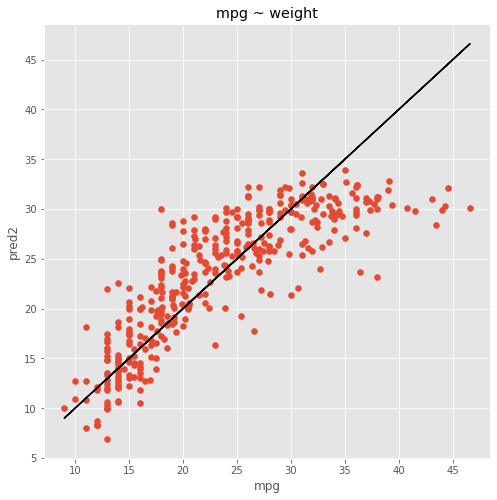

In [65]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(mpg_df['mpg'],
       mpg_df['mpg'],
       color='black')

ax.scatter(mpg_df['mpg'],
          mpg_df['pred2'])

ax.set_xlabel('mpg')
ax.set_ylabel('pred2')

# add title
ax.set_title(formula2)

plt.show()

Notice that if we want to use other explanatory variables than `horsepower`, we have two options:

- Re-write our program above using a new explanatory variable. Boring!
- Write a function that estimates an OLS model for any given explanatory variable. Fun!

Let us create three functions:

1. `get_model` that estimates an OLS model given a model formula and data:

In [6]:
def get_model(formula, df):
    
    # create OLS model
    model = smf.ols(formula, data = df)

    # estimate model
    model = model.fit()
    
    return model

2. `get_pred` that creates the in-sample predictions using the model from `get_model`.

In [7]:
def get_pred(df, model):
    
    # make predictions
    pred = model.predict()
    
    # add predictions to df
    df['pred'] = pred
    
    return df

3. `plot_pred` that plots the predictions along with the 45 degree line.

In [8]:
def plot_pred(df):
    
    fig, ax = plt.subplots(figsize=(8,8))

    # 45 degree line
    ax.plot(df['mpg'], 
            df['mpg'], 
            color = 'black')

    # scatter plot
    ax.scatter(df['mpg'],
               df['pred'])

    # add axis labels
    ax.set_xlabel('mpg')
    ax.set_ylabel('pred')
    
    # add title
    ax.set_title(formula)
    
    plt.show()

Let us re-run the estimation above, but using our functions instead.

- Step 1: estimate the model

In [9]:
# define formula
formula = 'mpg ~ horsepower'

# estimate model
model = get_model(formula, mpg_df)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           7.03e-81
Time:                        08:27:16   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Step 2: generate in-sample predictions

In [74]:
# get predictions
mpg_df = get_pred(mpg_df, model)

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name,pred,pred2
54,35.0,4,69.0,1613,18.0,71,japan,datsun 1200,29.044574,33.881361
144,31.0,4,52.0,1649,16.5,74,japan,toyota corona,31.727935,33.606057
343,39.1,4,58.0,1755,16.9,81,japan,toyota starlet,30.780866,32.795438
345,35.1,4,60.0,1760,16.1,81,japan,honda civic 1300,30.465177,32.757202
53,31.0,4,65.0,1773,19.0,71,japan,toyota corolla 1200,29.675953,32.657786


- Step 3: plot predictions

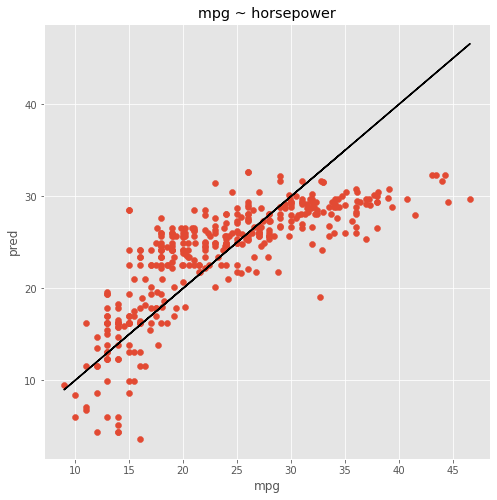

In [75]:
# plot predictions
plot_pred(mpg_df)

<div class = "alert alert-info">
<h3> Your turn</h3>
    
<p> Create a function called <code>get_rsqr</code> that takes the two inputs: a model formula and a <code>DataFrame</code>.
The function should estimate a regression model using the model formula and the data, and return the model's adjusted R-squared.
    
</p>
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
def get_rsqr(formula, df):
    
    # create and fit an OLS model
    model = smf.ols(formula, data = df).fit()
    
    # store adj. R-squared
    rsqr = model.rsquared_adj
    
    return rsqr

formula2 = 'mpg ~ weight'

get_rsqr(formula2, mpg_df)
```

</p>
</details> 

In [83]:
def get_rsqr(formula, df):
    
    #model = get_model(formula, df)
    model = smf.ols(formula, data = df)
    model = model.fit()

    rsqr = model.rsquared
    
    return rsqr

formula2 = 'mpg ~ weight'

get_rsqr(formula2, mpg_df)

0.6926304331206254

## Multiple linear regression

In multiple linear regression, we expand the simple model to include multiple explanatory variables:

$y_i = \alpha + \beta_1 x_{i, 1} + \beta_2 x_{i, 2} + \beta_3 x_{i, 3}$ ...

In general, we can increase the explanatory power of our model (R-squared) by including more explanatory variables. 

`corr` shows that there is also a high correlation between a cars' fuel economy and their weight.

In [84]:
mpg_df.corr()

,mpg,cylinders,horsepower,weight,acceleration,model_year,pred,pred2
mpg,1.000000,-0.777618,-0.778427,-0.832244,0.423329,0.580541,0.778427,0.832244
cylinders,-0.777618,1.000000,0.842983,0.897527,-0.504683,-0.345647,-0.842983,-0.897527
horsepower,-0.778427,0.842983,1.000000,0.864538,-0.689196,-0.416361,-1.000000,-0.864538
weight,-0.832244,0.897527,0.864538,1.000000,-0.416839,-0.309120,-0.864538,-1.000000
acceleration,0.423329,-0.504683,-0.689196,-0.416839,1.000000,0.290316,0.689196,0.416839
model_year,0.580541,-0.345647,-0.416361,-0.309120,0.290316,1.000000,0.416361,0.309120
pred,0.778427,-0.842983,-1.000000,-0.864538,0.689196,0.416361,1.000000,0.864538
pred2,0.832244,-0.897527,-0.864538,-1.000000,0.416839,0.309120,0.864538,1.000000


We will now estimate the following model:

$mpg_i = \alpha + \beta_1 \times horsepower_i + \beta_2 \times weight_i$

We expand the model formula with weight as an explanatory variable.

In [85]:
formula = 'mpg ~ horsepower + weight'

Let us use the functions that we created above and execute the same three steps:

- Step 1: estimate the model

In [86]:
# estimate model
model = get_model(formula, mpg_df)

# model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Thu, 13 Jan 2022   Prob (F-statistic):          3.06e-104
Time:                        14:09:05   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Step 2: generate in-sample predictions

In [87]:
# create in-sample predictions
mpg_df = get_pred(mpg_df, model)

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name,pred,pred2
54,35.0,4,69.0,1613,18.0,71,japan,datsun 1200,33.030337,33.881361
144,31.0,4,52.0,1649,16.5,74,japan,toyota corona,33.625896,33.606057
343,39.1,4,58.0,1755,16.9,81,japan,toyota starlet,32.727899,32.795438
345,35.1,4,60.0,1760,16.1,81,japan,honda civic 1300,32.604322,32.757202
53,31.0,4,65.0,1773,19.0,71,japan,toyota corolla 1200,32.292484,32.657786


- Step 3: plot predictions

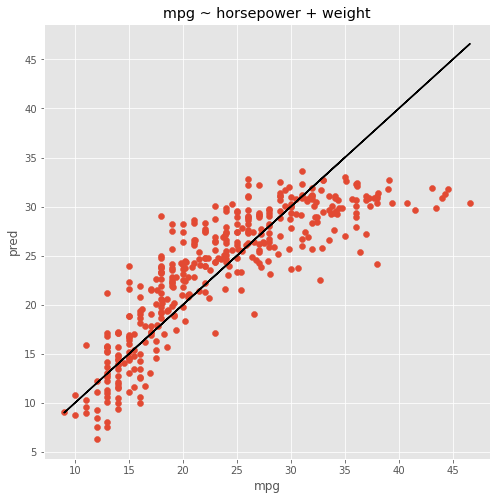

In [88]:
plot_pred(mpg_df)

As before, if the model does a good job at explaining the variation in fuel economy, we would expect the predictions to be close to actual observations. From the plot, we can see that the model still under-predicts fuel economy for high levels of mpg.

<div class = "alert alert-info">
<h3> Your turn</h3>
    
<p> Notice that we still need to execute a lot of code in order to get the plot with the predictions from the OLS model.

Create a function called <code>main</code> that executes all of the three steps by using the functions  <code>get_model</code>, <code>get_pred</code> and <code>plot_pred</code>. The function should take two inputs: a model formula and a <code>DataFrame</code>, and it should display the plot with the predictions.
    
Use <code>main</code> to reproduce the same plot as above for the regression model with <code>horsepower</code> and <code>weight</code> as the explanatory variables.
    
</p>
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
def main(df, formula):
    
    # estimate model
    model = get_model(formula, df)
    
    # create in-sample predictions
    df = get_pred(df, model)
    
    plot_pred(df)
    
main(mpg_df, 'mpg ~ horsepower + weight')
```

</p>
</details> 

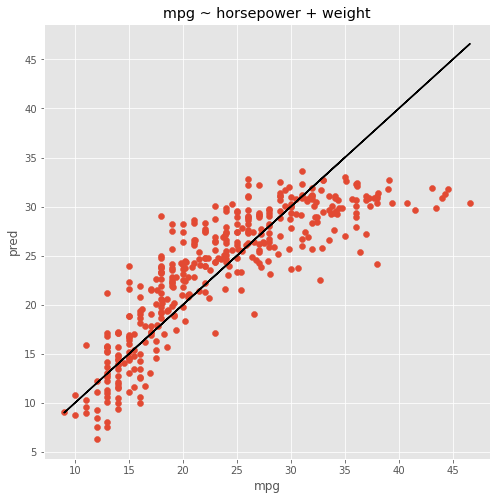

In [92]:

def main(formula,df):
    
    model=get_model(formula,df)
    pred = get_pred(df,model)
    plot_pred(df)
    
main('mpg ~ horsepower + weight',mpg_df)

#### Polynomial regression


From the scatter plot, we can see that the relationship between cars' fuel economy and horsepower does not seem to be linear.

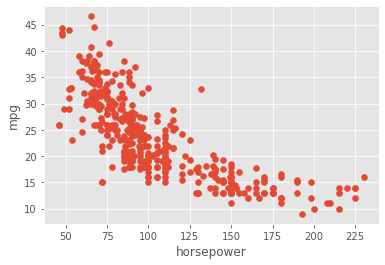

In [94]:
fig, ax = plt.subplots()

ax.scatter(mpg_df['horsepower'],
           mpg_df['mpg'])

# add axis labels
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

plt.show()

When the relationship between a dependent and independent variable is not linear, a polynomial model is usually more appropiate. 

In a 2nd order polynomial model, we expand the model to also include the squared of the explanatory variable.

Let us estimate the following 2nd order polynomial model:

$mpg_i = \alpha + \beta_1 \times horsepower_i + \beta_2 \times horsepower_i^2$

In R-style formula, we can include the squared explanatory variable by adding the term `I(horsepower**2)`. 

In [95]:
formula = 'mpg ~ horsepower + I(horsepower**2)'

Again, we use `get_model` to estimate the OLS model.

In [96]:
# estimate model
model = get_model(formula, mpg_df)

# model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           5.40e-99
Time:                        14:28:53   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1.800     31.604      0.000      53.360      60.440
horsepower            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
I(horsepower ** 2)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We use `get_pred` to the in-sample predictions from the model.

In [100]:
# create in-sample predictions
mpg_df = get_pred(mpg_df, model)

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name,pred,pred2
102,26.0,4,46.0,1950,21.0,73,europe,volkswagen super beetle,30.591598,31.304207
19,26.0,4,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan,35.985609,32.183651
326,43.4,4,48.0,2335,23.7,80,europe,vw dasher (diesel),34.000625,28.359980
325,44.3,4,48.0,2085,21.7,80,europe,vw rabbit c (diesel),33.358652,30.271815
244,43.1,4,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel,31.796789,31.036550


Since there is technically only one explanatory variable in the model (`horsepower`), we can visualize the regression line.

Remember, we must sort the `DataFrame` according to the explanatory variable in order to get a nice-looking line.

In [101]:
# sort values
mpg_df.sort_values('horsepower', inplace = True)

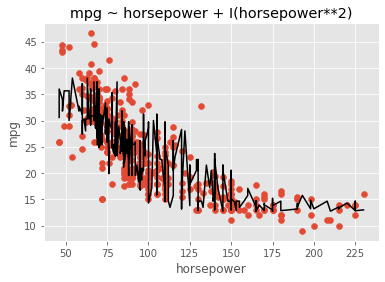

In [102]:
fig, ax = plt.subplots()

# scatter plot
ax.scatter(mpg_df['horsepower'],
           mpg_df['mpg'])

# line plot
ax.plot(mpg_df['horsepower'],
        mpg_df['pred'],
        color = 'black')

# add axis labels
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

# add title
ax.set_title(formula)

plt.show()

As before, we can use `plot_pred` to visually inspect the predictions of the model.

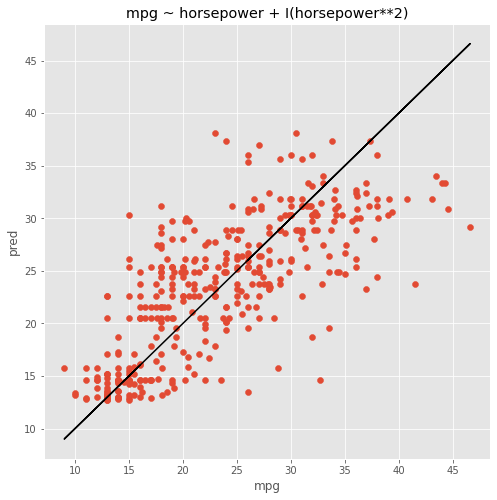

In [103]:
plot_pred(mpg_df)

From the plot, it seems that 2nd order polynomial model does a better job at predicting fuel economy. However, the model still slightly under-predicts fuel economy at high levels of mpg.

Notice that there seems to be a non-linear relationship between `mpg` and the potential explanatory variables `horsepower`, `weight`, `acceleration`, and `model_year`.

In [104]:
var_lst = ['horsepower', 'weight', 'acceleration', 'model_year']

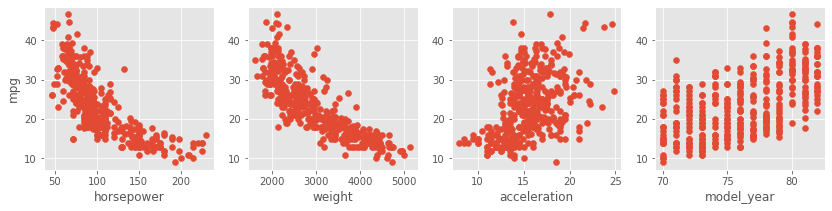

In [106]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (14, 3))

for i in range(len(var_lst)):

    # create a scatter plot with mpg
    ax[i].scatter(mpg_df[var_lst[i]],
                  mpg_df['mpg'])
    
    # add ylabel
    ax[i].set_xlabel(var_lst[i])

ax[0].set_ylabel('mpg')

plt.show()

<div class = "alert alert-info">
<h3> Your turn</h3>
    
<p> Create a <code>for</code> loop where you estimate a 2nd order polynomial model using only one of the potential explanatory variables: <code>horsepower</code>, <code>weight</code>, <code>acceleration</code> and <code>model_year</code>. 
    
In each iteration:
    
- Create the model formula.
- Use the function <code>get_rsqr</code> that you created above to extract the model's adj. R-squared.
- Store the adj. R-squared in a list.
    
Which 2nd order polynomial model has the highest adj. R-squared?
    
</p>
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
rsqr_lst = []

for var in ['horsepower', 'weight', 'acceleration', 'model_year']:
    
    # create model formula
    formula = 'mpg ~ ' + var + ' + I(' + var + '**2)'
    
    # extract ad. R-squared
    rsqr = get_rsqr(formula, mpg_df)
    
    # append to list
    rsqr_lst.append(rsqr)
    
print(rsqr_lst)
```

</p>
</details> 

In [116]:
var_lst = ['horsepower', 'weight', 'acceleration', 'model_year']
rsqr_List = []
for i in var_lst:

    formula = 'mpg ~ '+str(i)+" + I("+str(i)+'**2)'
    rsqr_List.append(get_rsqr(formula, mpg_df))

rsqr_dict = {var_lst[0]:rsqr_List[0],
            var_lst[1]:rsqr_List[1],
            var_lst[2]:rsqr_List[2],
            var_lst[3]:rsqr_List[3],}
rsqr_dict

{'horsepower': 0.6875590305127515,
 'weight': 0.7151475557845139,
 'acceleration': 0.19396401103217586,
 'model_year': 0.3675258408630109}

#### Categorical variables

In linear regression models we often want to include categorical variables in order to allow different intercepts for different groups in our data.

Notice that our `mpg` data contains the categorical variable `origin`. In fact, the average fuel economy is very different for cars from the US compared to cars from Europe and Japan.

In [117]:
mpg_df.groupby('origin')['mpg'].mean()

origin
europe    27.602941
japan     30.450633
usa       20.033469
Name: mpg, dtype: float64

In R-style formula, we can include categorical variables by adding the term `C(origin)`. 

In [118]:
formula = 'mpg ~ horsepower + C(origin)'

In [119]:
# estimate model
model = get_model(formula, mpg_df)

# model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     253.4
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           4.93e-91
Time:                        14:55:15   Log-Likelihood:                -1148.5
No. Observations:                 392   AIC:                             2305.
Df Residuals:                     388   BIC:                             2321.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             38.3695      0.781     49.098      0.000      36.833      39.906
C(origin)[T.japan]     2.7510      0.753      3.651      0.000       1.270       4.232
C(origin)[T.usa]      -2.4253      0.678     -3.578      0.000      -3.758      -1.093
horsepower            -0.1336      0.007    -19.474      0.000      -0.147      -0.120
==============================================================================
Omnibus:                       23.486   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.987
Skew:                           0.602   Prob(JB):                     2.27e-06
Kurtosis:                       3.376   Cond. No.                         501.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# create in-sample predictions
mpg_df = get_pred(mpg_df, model)

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name,pred,pred2
102,26.0,4,46.0,1950,21.0,73,europe,volkswagen super beetle,32.221659,31.304207
19,26.0,4,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan,32.221659,32.183651
326,43.4,4,48.0,2335,23.7,80,europe,vw dasher (diesel),31.954363,28.359980
325,44.3,4,48.0,2085,21.7,80,europe,vw rabbit c (diesel),31.954363,30.271815
244,43.1,4,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel,31.954363,31.036550


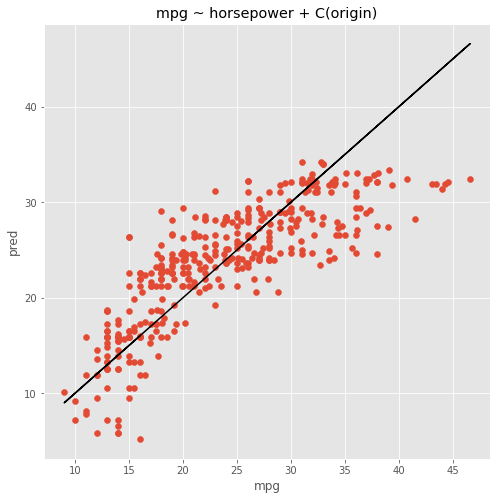

In [121]:
plot_pred(mpg_df)

<div class = "alert alert-info">
<h3> Your turn</h3>
    
<p> In linear regression models it is common to include the year variable as a categorical variable instead of as a continuous variable. These are known as year dummies. Expand the model above with <code>model_year</code> as a categorical variable. Display the predictions along the 45 degree line. 
    
</p>
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
# expand the model formula
formula = 'mpg ~ horsepower + C(origin) + C(model_year)'

# estimate model
model = get_model(formula, mpg_df)

# create in-sample predictions
mpg_df = get_pred(mpg_df, model)

# display predictions
plot_pred(mpg_df)
```

</p>
</details> 

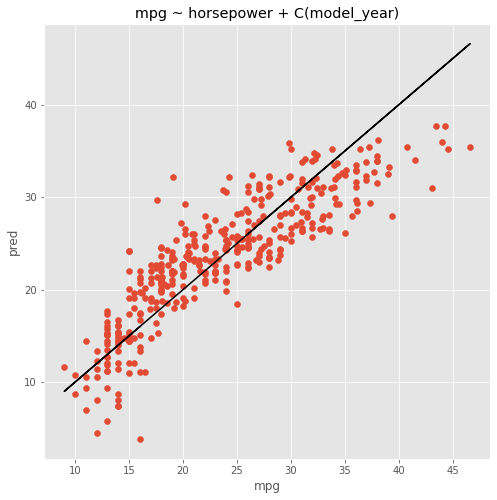

In [123]:
formula = 'mpg ~ horsepower + C(model_year)'
model = get_model(formula, mpg_df)

# model summary
model.summary()
mpg_df = get_pred(mpg_df, model)

mpg_df.head()
plot_pred(mpg_df)

## Mandatory exercise part 2

The presence of outliers, i.e. observations with "untypical" values, can heavliy influence our regression results. An important step in statistical analysis is therefore to investigate the presence of potential outliers.

In the simple regression model that we estimated first we saw that we the model consistently underpredicted `mpg` at high levels of actual `mpg`. Could this be caused by some car models having untypical/extreme levels of horsepower?

Import `mpg.xlsx` and explore the presence of extreme values of horsepower in the data and its effect on the simple regression model (`mpg ~ horsepower`).

1. Check for outliers in `horsepower`. Present whatever descriptive and/or graphical analysis that you see fit.


2. Explore how much dropping a single observation, i.e. car model, from the data affects the estimated coefficient on `horsepower`:

    a. Create a function called `get_beta` that estimates a simple regression model and returns the beta coefficient for the explanatory/independent variable. The function should take three inputs: `df` (the dataset), `dep` (column name of the dependent variable) and `indep` (column name for the independent variable). 
    
    b. Ceate a `for` loop where you in each iteration drop an observation from the data and use `get_beta` to retreieve the beta coefficient from that model. Notice that in the first iteration you should drop the first observation. In the second iteration you should keep the first observation but drop the second observation. In the third iteration you should keep the first and second observations, but drop the third one, and so on...
    
    c. Show a histogram of the estimated beta coefficients. What is your verdict? Does it seem that the estimated coefficient on `horsepower` is affected by the presence of outliers?




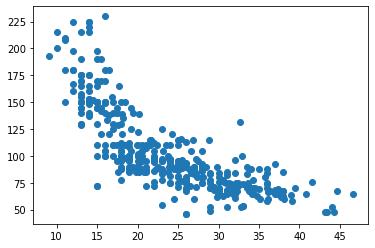

In [3]:
mpg_df = pd.read_excel("data/mpg.xlsx")

fig, ax = plt.subplots()

ax.scatter(mpg_df['mpg'],
       mpg_df['horsepower'])

plt.show()


In [14]:
mpg_df["horsepower"].describe()

#We have a few outliers, those with a lot of horsepower bu the same miles per gallon as cars with low horsepower.

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [15]:
def get_beta(df,dep,indep):

    formula = ''+dep+' ~ '+indep+''
    model = get_model(formula, df)
    
    return model.params[1].round(3)
   
get_beta(mpg_df,'mpg','horsepower')

-0.158

In [13]:
list_beta = []
for i in range(len(mpg_df)):
    mpg_df2 = mpg_df.drop(labels=i,axis=0)
    beta = get_beta(mpg_df2,'mpg','horsepower')
    list_beta.append(beta)
    
    
list_beta
    


[-0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.159,
 -0.16,
 -0.159,
 -0.16,
 -0.159,
 -0.158,
 -0.158,
 -0.158,
 -0.16,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.159,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.159,
 -0.158,
 -0.159,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.157,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.159,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.159,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.159,
 -0.159,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.159,
 -0.157,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.158,
 -0.

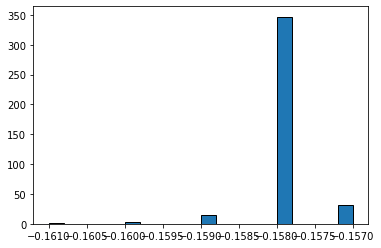

In [16]:

fig, ax = plt.subplots()

ax.hist(list_beta,
       bins=20
       ,edgecolor="black")

plt.show()

In [ ]:
#we clearly have som outliers. At least the observation that makes the coefficient go from -0,158 to -0,161.